# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/gold_recovery_full.csv', parse_dates=True, index_col='date')
pd.set_option('display.max_columns', None)
df

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant                      21170 non-null float64
primary_c

In [995]:
df.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615

In [996]:
df_train = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/gold_recovery_train.csv', parse_dates=True, index_col='date')
df_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [997]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant                      15598 non-null float64
primary_c

In [998]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775

In [999]:
df_test = pd.read_csv('/Users/fidanb/Downloads/yandex praktikum/all datasets/gold_recovery_test.csv', parse_dates=True, index_col='date')
df_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [1000]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.input.feed_ag                    

In [1001]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.551547,962.005375,-477.795380,25.479808,-513.714941,21.083475,-512.325717,24.345831,-519.417733,20.068079,-515.028316,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,313.725248,65.417633,2.985805,1.326113,155.958272,22.724254,10.793249,2.803046,3.997715,1.673606,4.533948,1.120371,226.494775,100.953782,285.247715,55.399631,290.703157,53.759053,285.407244,54.967985,231.675756,67.002595,220.862435,68.342305,5.450424,62.448366,5.940017,63.376776,7.950733,73.968109,7.644391,60.457838,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,0.000000,-799.838846,0.000000,0.000000,0.002986,0.046369,0.000000,0.000000,0.000154,0.000052,0.000014,0.000055,-0.123194,-657.949759,-0.821921,-650.349159,-0.282087,-650.000000,-1.047388,-648.390665,-2.076798,-650.152533,-2.593390,-650.034631,0.000000,-799.608557,0.000000,-798.467243,0.000000,-799.7

##### Вывод: даны 3 выборки, имеются пропуски, в исходной и обучающей количество столбцов =  87и строк совпадает, в тестовой же имеется 53 столбца. Все данные в таблице в типе float, кроме даты, поэтому сразу же удалила этот столбец во всех выборках.

Эффективность обогащения рассчитывается по формуле:
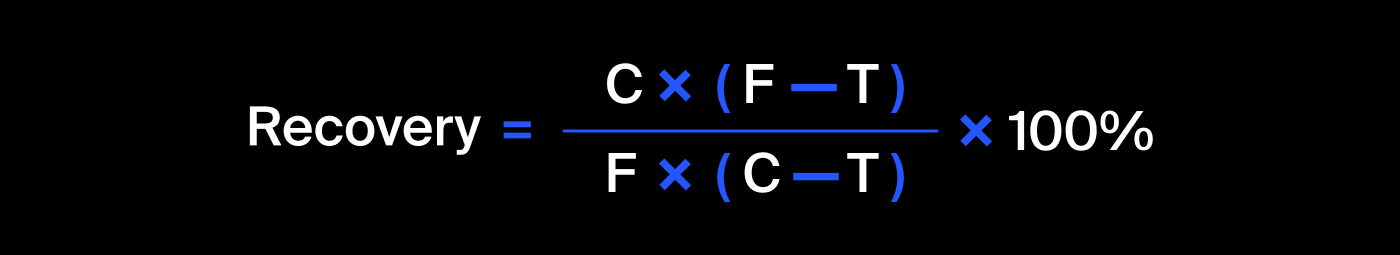
где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

In [1002]:
df_train.isnull().sum()

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [1003]:
df_train_mae = df_train

In [1004]:
df_train_mae.isnull().sum()

final.output.concentrate_ag                     72
final.output.concentrate_pb                     72
final.output.concentrate_sol                   370
final.output.concentrate_au                     71
final.output.recovery                         1521
                                              ... 
secondary_cleaner.state.floatbank5_a_level      85
secondary_cleaner.state.floatbank5_b_air        85
secondary_cleaner.state.floatbank5_b_level      84
secondary_cleaner.state.floatbank6_a_air       103
secondary_cleaner.state.floatbank6_a_level      85
Length: 86, dtype: int64

In [1005]:
df_train_mae.dropna(inplace=True)

In [1006]:
df_train_mae.isnull().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

In [1007]:
def recovery_calc(C,F,T):
    C = df_train_mae['rougher.output.concentrate_au']
    F = df_train_mae['rougher.input.feed_au']
    T = df_train_mae['rougher.output.tail_au']
    recovery = (C*(F-T)/(F*(C-T)))*100.0
    recovery = recovery.fillna(0.0)
    recovery = recovery.replace([np.inf, -np.inf], 0.0)
    return recovery

In [1008]:
df_train_mae['recovery_recalc'] = recovery_calc(df_train_mae['rougher.output.concentrate_au'],df_train_mae['rougher.input.feed_au'],df_train['rougher.output.tail_au'])
df_train_mae['recovery_recalc']

date
2016-01-15 00:00:00    87.107763
2016-01-15 01:00:00    86.843261
2016-01-15 02:00:00    86.842308
2016-01-15 03:00:00    87.226430
2016-01-15 04:00:00    86.688794
                         ...    
2018-08-18 06:59:59    89.574376
2018-08-18 07:59:59    87.724007
2018-08-18 08:59:59    88.890579
2018-08-18 09:59:59    89.858126
2018-08-18 10:59:59    89.514960
Name: recovery_recalc, Length: 11017, dtype: float64

In [1009]:
print(df_train_mae['recovery_recalc'].isna().sum())
print(df_train_mae['rougher.output.recovery'].isna().sum())
print(np.all(np.isfinite(df_train_mae['recovery_recalc'].isna().sum())))
print(np.all(np.isfinite(df_train_mae['rougher.output.recovery'].isna().sum())))

0
0
True
True


In [1010]:
s = df_train_mae['rougher.output.recovery']
m = df_train_mae['recovery_recalc']

In [1011]:
df_train_mae = pd.DataFrame({'Actual': s, 'Calculated': m})
df_train_mae

,Actual,Calculated
date,,
2016-01-15 00:00:00,87.107763,87.107763
2016-01-15 01:00:00,86.843261,86.843261
2016-01-15 02:00:00,86.842308,86.842308
2016-01-15 03:00:00,87.226430,87.226430
2016-01-15 04:00:00,86.688794,86.688794
...,...,...
2018-08-18 06:59:59,89.574376,89.574376
2018-08-18 07:59:59,87.724007,87.724007
2018-08-18 08:59:59,88.890579,88.890579


In [1012]:
df_train_mae['diff'] = df_train_mae['Actual'].round()-df_train_mae['Calculated'].round()
df_train_mae

,Actual,Calculated,diff
date,,,
2016-01-15 00:00:00,87.107763,87.107763,0.0
2016-01-15 01:00:00,86.843261,86.843261,0.0
2016-01-15 02:00:00,86.842308,86.842308,0.0
2016-01-15 03:00:00,87.226430,87.226430,0.0
2016-01-15 04:00:00,86.688794,86.688794,0.0
...,...,...,...
2018-08-18 06:59:59,89.574376,89.574376,0.0
2018-08-18 07:59:59,87.724007,87.724007,0.0
2018-08-18 08:59:59,88.890579,88.890579,0.0


In [1013]:
 print('MAE:', mean_absolute_error(s, m))

MAE: 9.555596961987514e-15


##### Вывод: после подсчета МАЕ получилось число с экпонентой в -15 степени, т.е. почти 0, что говорит о том, что Recovery в таблице был изначально правильно подсчитан.

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [1014]:
train_set = set(pd.Series(df_train.columns))
train_set

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floa

In [1015]:
test_set = set(pd.Series(df_test.columns))
test_set

{'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_air',
 'rough

In [1016]:
diff = train_set - test_set
diff

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery_recalc',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',

##### Вывод: после вычитания сета тестовой выборки из обучающей, обнаружили отсутствие 34 колонок в тестовом датафрейме. Это практически все основные столбцы, которые дают информацию о концентрации металлов полученных на каждом этапе очистки, а также в "хвостах"; и также столцы с целевыми признаками

### 1.4. Проведите предобработку данных.

In [1017]:
df.isnull().sum()

final.output.concentrate_ag                     89
final.output.concentrate_pb                     87
final.output.concentrate_sol                   385
final.output.concentrate_au                     86
final.output.recovery                         1963
                                              ... 
secondary_cleaner.state.floatbank5_a_level     101
secondary_cleaner.state.floatbank5_b_air       101
secondary_cleaner.state.floatbank5_b_level     100
secondary_cleaner.state.floatbank6_a_air       119
secondary_cleaner.state.floatbank6_a_level     101
Length: 86, dtype: int64

#### <span style="color:light blue"> Воспользовавшись interpolate, заполнила все пропуски по соседним по времени значениям для всех выборок </span>

In [1018]:
#Заполнение по interpolate()
df = df.interpolate(method='time')
df_train = df_train.interpolate(method='time')
df_test = df_test.interpolate(method='time')

In [1019]:
df.isnull().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

In [1020]:
df_train.isnull().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
recovery_recalc                               0
Length: 87, dtype: int64

In [1021]:
df_test.isnull().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

In [1022]:
df.shape, df_train.shape, df_test.shape

((22716, 86), (11017, 87), (5856, 52))

#### Датасет  обучающей выборки также сохранила в еще один вариант, где пропуски заполнены по среднему

# 2. Анализ данных

#### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

### При построении графиков использовала только обучающую выборку по 2 вариантам: заполненную средним значением и с удаленными пропусками. При распределении концентрации металлов по среднему появляется высокий пик около 0. Поэтому в следующих пунктах  решила использовать "дропнутую версию". 

In [1023]:
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

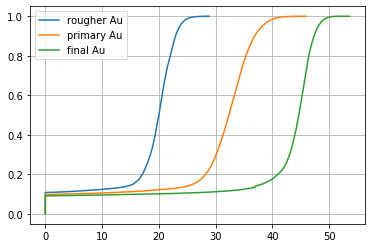

In [1024]:
df1 = df['rougher.output.concentrate_au']
df2 = df['primary_cleaner.output.concentrate_au']
df3 = df['final.output.concentrate_au']
ecdf1 = ECDF(df1)
ecdf2 = ECDF(df2)
ecdf3 = ECDF(df3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Au')
plt.plot(ecdf2.x,ecdf2.y,label='primary Au')
plt.plot(ecdf3.x,ecdf3.y, label='final Au')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

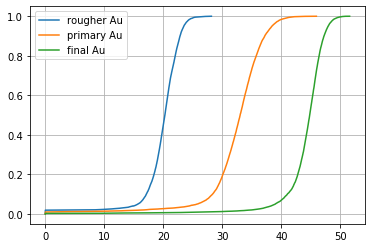

In [1025]:
df_train1 = df_train['rougher.output.concentrate_au']
df_train2 = df_train['primary_cleaner.output.concentrate_au']
df_train3 = df_train['final.output.concentrate_au']
ecdf1 = ECDF(df_train1)
ecdf2 = ECDF(df_train2)
ecdf3 = ECDF(df_train3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Au')
plt.plot(ecdf2.x,ecdf2.y,label='primary Au')
plt.plot(ecdf3.x,ecdf3.y, label='final Au')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

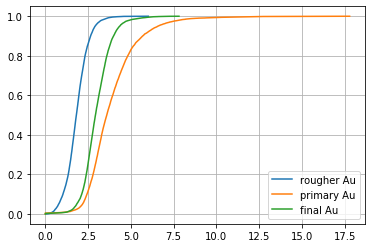

In [1026]:
df_train1 = df_train['rougher.output.tail_au']
df_train2 = df_train['primary_cleaner.output.tail_au']
df_train3 = df_train['final.output.tail_au']
ecdf1 = ECDF(df_train1)
ecdf2 = ECDF(df_train2)
ecdf3 = ECDF(df_train3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Au')
plt.plot(ecdf2.x,ecdf2.y,label='primary Au')
plt.plot(ecdf3.x,ecdf3.y, label='final Au')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

<span style="color:Green">
    
**2019-12-27 DD**

Здорово, что решила попробовать ECDF. Ты можешь видеть, что кривая ECDF более точно описывает распределение данных (т.к. в ней нет аппроксимации, это точно рассчитываемая кривая), а кривая KDE может показывать существование значений в тех областях. в которых их не может быть, исходя из физического смысла (меньше нуля).

Для вычисления ECDF удобно использовать распространённый пакет statsmodels: https://www.statsmodels.org/devel/generated/statsmodels.distributions.empirical_distribution.ECDF.html

Пакет mlxtend выглядит экзотичным, statsmodels гораздо более на слуху.

</span>

#### Вывод: график показывает , что после каждого этапа очистки концентрация золота увеличивается, что может говорить нам о том, что действительно происходит очистка руды. Как видно, в "хвостах" на этапе первичной очистки "primary" , золота теряется больше, чем на других этапах

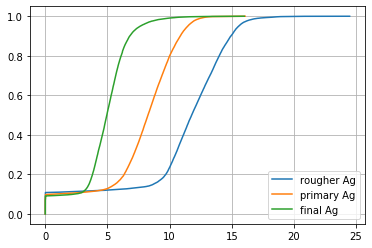

In [1027]:
df1 = df['rougher.output.concentrate_ag']
df2 = df['primary_cleaner.output.concentrate_ag']
df3 = df['final.output.concentrate_ag']
ecdf1 = ECDF(df1)
ecdf2 = ECDF(df2)
ecdf3 = ECDF(df3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Ag')
plt.plot(ecdf2.x,ecdf2.y,label='primary Ag')
plt.plot(ecdf3.x,ecdf3.y, label='final Ag')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

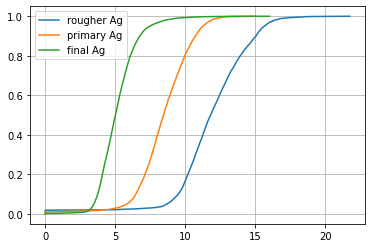

In [1028]:
df_train1 = df_train['rougher.output.concentrate_ag']
df_train2 = df_train['primary_cleaner.output.concentrate_ag']
df_train3 = df_train['final.output.concentrate_ag']
ecdf1 = ECDF(df_train1)
ecdf2 = ECDF(df_train2)
ecdf3 = ECDF(df_train3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Ag')
plt.plot(ecdf2.x,ecdf2.y,label='primary Ag')
plt.plot(ecdf3.x,ecdf3.y, label='final Ag')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

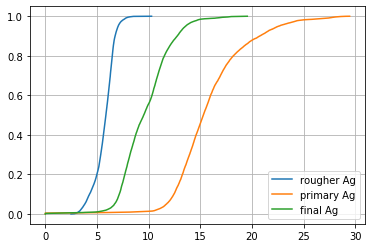

In [1029]:
df_train1 = df_train['rougher.output.tail_ag']
df_train2 = df_train['primary_cleaner.output.tail_ag']
df_train3 = df_train['final.output.tail_ag']
ecdf1 = ECDF(df_train1)
ecdf2 = ECDF(df_train2)
ecdf3 = ECDF(df_train3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Ag')
plt.plot(ecdf2.x,ecdf2.y,label='primary Ag')
plt.plot(ecdf3.x,ecdf3.y, label='final Ag')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

#### Вывод: график показывает , что после каждого этапа очистки концентрация серебра уменьшается, что может говорить нам о том, что на этапе очистки происходит потеря металла. Как видно, в "хвостах" на этапе первичной очистки "primary" , серебра теряется больше, чем на других этапах

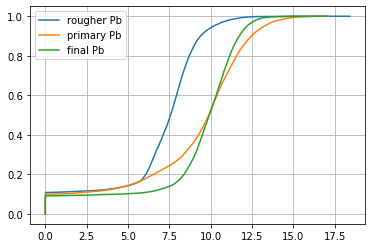

In [1030]:
df1 = df['rougher.output.concentrate_pb']
df2 = df['primary_cleaner.output.concentrate_pb']
df3 = df['final.output.concentrate_pb']
ecdf1 = ECDF(df1)
ecdf2 = ECDF(df2)
ecdf3 = ECDF(df3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Pb')
plt.plot(ecdf2.x,ecdf2.y,label='primary Pb')
plt.plot(ecdf3.x,ecdf3.y, label='final Pb')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

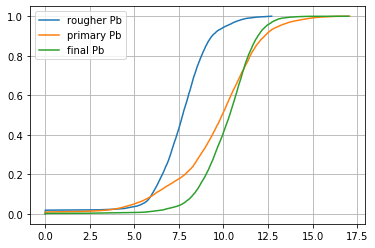

In [1031]:
df_train1 = df_train['rougher.output.concentrate_pb']
df_train2 = df_train['primary_cleaner.output.concentrate_pb']
df_train3 = df_train['final.output.concentrate_pb']
ecdf1 = ECDF(df_train1)
ecdf2 = ECDF(df_train2)
ecdf3 = ECDF(df_train3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Pb')
plt.plot(ecdf2.x,ecdf2.y,label='primary Pb')
plt.plot(ecdf3.x,ecdf3.y, label='final Pb')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

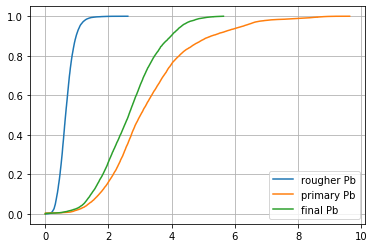

In [1032]:
df_train1 = df_train['rougher.output.tail_pb']
df_train2 = df_train['primary_cleaner.output.tail_pb']
df_train3 = df_train['final.output.tail_pb']
ecdf1 = ECDF(df_train1)
ecdf2 = ECDF(df_train2)
ecdf3 = ECDF(df_train3)
plt.plot(ecdf1.x,ecdf1.y,label='rougher Pb')
plt.plot(ecdf2.x,ecdf2.y,label='primary Pb')
plt.plot(ecdf3.x,ecdf3.y, label='final Pb')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()

#### Вывод: график показывает , что в финальном этапе очистки получается наиболее концентрированный свинец . Однако по графику видно, как линии накладываются друг на друга- это может говорить о наличии выбросов в данных, а также  в "хвостах" на этапе первичной очистки "primary" , свинца теряется больше, чем на других этапах

#### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

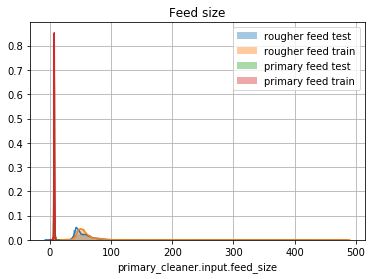

In [1033]:
rougher_test = df_test[df_test == 'rougher.input.feed_size']
sns.distplot(df_test['rougher.input.feed_size'], hist = True, label='rougher feed test')
rougher_train = df_train[df_train == 'rougher.input.feed_size']
sns.distplot(df_train['rougher.input.feed_size'], hist = True, label='rougher feed train')
primary_test = df_test[df_test == 'primary_cleaner.input.feed_size']
sns.distplot(df_test['primary_cleaner.input.feed_size'], hist = True, label='primary feed test')
primary_train = df_train[df_train == 'primary_cleaner.input.feed_size']
sns.distplot(df_train['primary_cleaner.input.feed_size'], hist = True, label='primary feed train')
plt.legend(prop={'size': 10})
plt.title('Feed size')
plt.grid(True)
plt.show()

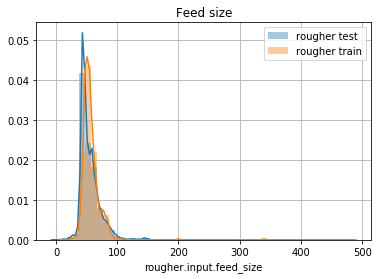

In [1034]:
primary_test = df_test[df_test == 'rougher.input.feed_size']
sns.distplot(df_test['rougher.input.feed_size'], hist = True, label='rougher test')
primary_train = df_train[df_train == 'rougher.input.feed_size']
sns.distplot(df_train['rougher.input.feed_size'], hist = True, label='rougher train')
plt.legend(prop={'size': 10})
plt.title('Feed size')
plt.grid(True)
plt.show()

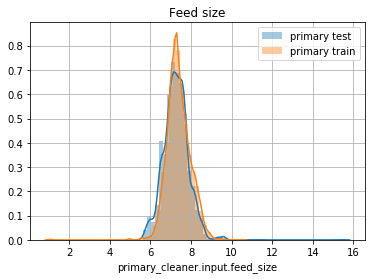

In [1035]:
primary_test = df_test[df_test == 'primary_cleaner.input.feed_size']
sns.distplot(df_test['primary_cleaner.input.feed_size'], hist = True, label='primary test')
primary_train = df_train[df_train == 'primary_cleaner.input.feed_size']
sns.distplot(df_train['primary_cleaner.input.feed_size'], hist = True, label='primary train')
plt.legend(prop={'size': 10})
plt.title('Feed size')
plt.grid(True)
plt.show()

### Вывод: сильных различий в размерах гранул сырья между обучающей и тестовой выборками на графике не видно

<span style="color:Green">

**2019-12-29 DD**

Согласен. Формально, для проверки того, что выборки взяты из одной генеральной совокупности ещё можно было провести U-тест Mann Whitney.

</span>

#### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

In [1036]:
rougher_sum = df_train['rougher.output.concentrate_ag'].sum() + df_train['rougher.output.concentrate_au'].sum() + df_train['rougher.output.concentrate_pb'].sum() + df_train['rougher.output.concentrate_sol'].sum()
primary_sum = df_train['primary_cleaner.output.concentrate_ag'].sum() + df_train['primary_cleaner.output.concentrate_au'].sum() + df_train['primary_cleaner.output.concentrate_pb'].sum() + df_train['primary_cleaner.output.concentrate_sol'].sum()
final_sum = df_train['final.output.concentrate_ag'].sum() + df_train['final.output.concentrate_au'].sum() + df_train['final.output.concentrate_pb'].sum() + df_train['final.output.concentrate_sol'].sum()
total_sum = rougher_sum + primary_sum + final_sum
total_sum

2178173.570367064

In [1037]:
print('rougher:',rougher_sum)
print('primary:',primary_sum)
print('final:',final_sum)

rougher: 748040.699280889
primary: 669285.3447095217
final: 760847.526376653


In [1038]:
from plotly.offline import iplot
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objects as go
import plotly.express as px

In [1039]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        y=[rougher_sum,primary_sum,final_sum]
    ))

fig.add_trace(
    go.Bar(
        y=[rougher_sum,primary_sum,final_sum]
    ))

fig.show()

In [1040]:
rougher_sum1 = df['rougher.output.concentrate_ag'].sum() + df['rougher.output.concentrate_au'].sum() + df['rougher.output.concentrate_pb'].sum() + df['rougher.output.concentrate_sol'].sum()
primary_sum1 = df['primary_cleaner.output.concentrate_ag'].sum() + df['primary_cleaner.output.concentrate_au'].sum() + df['primary_cleaner.output.concentrate_pb'].sum() + df['primary_cleaner.output.concentrate_sol'].sum()
final_sum1 = df['final.output.concentrate_ag'].sum() + df['final.output.concentrate_au'].sum() + df['final.output.concentrate_pb'].sum() + df['final.output.concentrate_sol'].sum()
total_sum1 = rougher_sum1 + primary_sum1 + final_sum1
total_sum1

4061484.675990723

In [1041]:
print('rougher:',rougher_sum1)
print('primary:',primary_sum1)
print('final:',final_sum1)

rougher: 1397648.3459780389
primary: 1249056.9901829925
final: 1414779.3398296917


In [1042]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        y=[rougher_sum1,primary_sum1,final_sum1]
    ))

fig.add_trace(
    go.Bar(
        y=[rougher_sum1,primary_sum1,final_sum1]
    ))

fig.show()

In [1043]:
df_train=df_train.drop(columns=['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol'])

In [1044]:
df=df.drop(columns=['primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_au','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol'])

#### Вывод: по графику видно, что на этапе первичной очистки сумма концентраций всех веществ получается меньше, чем в сырье, также графики выше, показывающие распределение концентраций металлов на каждом этапе, показали, что как раз на этапе очистки в "хвостах", происходит потеря сырья. Поэтому я удалила 4 колонки, показыающие концентрацию веществ на этапе первичной очиcтки, посчитав их аномалиями

<span style="color:Green">
    
**2019-12-27 DD**

Здесь немного бы просуммировать, с какими в итоге данными ты решила строить модель. Я так понял, что с теми, из которых были удалены строки с пропусками.

</span>

# 3. Модель

#### <span style="color:light blue"> Я посмотрела на исходный датафрейм. Далее по индексам в тестовой выборки посмотрела строки с теми же индексами в исходном, и добавила в тестовый</span>

<span style="color:Green">

**2019-12-29 DD**

Выглядит разумным, мы вправе воспользоваться всеми доступными данными, если в условии не говорится об обратном.

</span>

In [1045]:
index_lst = list(df_test.index.values)
df_test_new = df.loc[index_lst, :]
df_test_new.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5.856000e+03,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000,5856.000000
mean,4.967180,9.043622,9.606821,41.534184,65.609099,9.405078,2.854455,10.050539,3.229323,164.804907,8.166684,7.264651,1.288419,14.761555,3.203454,8.470580,3.894650,1481.929746,-509.137533,1486.908035,-511.817526,1468.549653,-509.815837,148

In [1046]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [1047]:
def smape(actual, predicted):
    return 100/len(actual) * np.sum(2 * np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted)))

<span style="color:Green">
    
**2019-12-27 DD**

Хорошо. Кстати, если хочется иметь формулы под рукой, то их можно писать сразу же в ноутбуке, например:

$$
\text{sMAPE} = \frac{1}{N} \sum_{i=1}^{N}{\frac{\vert y_i - \hat{y}_i \vert}{\frac{1}{2}(\vert y_i \vert + \vert \hat{y}_i \vert)}} \times 100\%
$$

</span>

$$
\text{Итоговое sMAPE} = \ 25\% \times \ {sMAPE (rougher)} \ + \ 75\% \times \ {sMAPE (final)}
$$

### <span style="color:light blue">  Делю сначала исходный датасет на обучающую и тестовую </span>

In [1048]:
#Для исходного датасета выделила 2 целевых признака
y1=df['rougher.output.recovery']
X1=df.drop('rougher.output.recovery', axis=1)
y2=df['final.output.recovery']
X2=df.drop('final.output.recovery', axis=1)

<span style="color:Green">

**2019-12-29 DD**

df - это же полный набор? Получается, что дальше мы уже вводим собственные наборы для тренировки и проверки (тестирования). Хмм... это может быть спорным шагом, т.к. Заказчик мог подготовить тестовый набор специально таким образом, чтобы проверить модель. Плюс это практически перечеркивает наши проверки train/test-наборов выше. Поэтому спорный шаг.

Ну, да, ладно. Давай попробуем так.

</span>

In [1049]:
# Разделила исходный датасет на обучающую, тестовую
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=12345)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=12345)

In [1050]:
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(17037, 81) (5679, 81) (17037,) (5679,)
(17037, 81) (5679, 81) (17037,) (5679,)


In [1051]:
diff = set(pd.Series(df_test_new.columns)) - set(pd.Series(X1_train.columns))
diff

{'rougher.output.recovery'}

In [1052]:
df_train.shape, df_test_new.shape

((11017, 83), (5856, 82))

In [1053]:
#df_train = df_train.drop(columns='recovery_recalc')

In [1054]:
#y1_train_new=df_train['rougher.output.recovery']
#X1_train_new=df_train.drop('rougher.output.recovery', axis=1)
#y2_train_new=df_train['final.output.recovery']
#X2_train_new=df_train.drop('final.output.recovery', axis=1)

In [1055]:
#diff = set(pd.Series(X1_train_new.columns)) - set(pd.Series(X1_test_new.columns))
#diff

### <span style="color:light blue"> Поделила новый тестовый датасет на обучающую и тестовую </span>

<span style="color:Green">

**2019-12-29 DD**

Не очень понятная формулировка: "тестовую" на "обучающую" и "тестовую"? Наверное, опечатка.

</span>

In [1056]:
y1_test_new=df_test_new['rougher.output.recovery']
X1_test_new=df_test_new.drop('rougher.output.recovery', axis=1)
y2_test_new=df_test_new['final.output.recovery']
X2_test_new=df_test_new.drop('final.output.recovery', axis=1)

In [1057]:
### Посчитала значение sMAPE для каждой модели

In [1058]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

#### <span style="color:light blue"> Написала функцию, которая сразу обучает, вычисляет метрики сразу для 2х целевых признаков. Обучение проходит на исходном обучающем датасете, предсказания делает на основе тестовой выборки, полученной по индексам</span>

In [1]:
def total_smape(model_type, x1_train, y1_train, x1_test, y1_test, x2_train, y2_train, x2_test, y2_test):
    if model_type == "linear":
        model = LinearRegression()
        model_final = LinearRegression()
    if model_type == "decision":
        model = DecisionTreeRegressor(random_state=12345)
        model_final = DecisionTreeRegressor(random_state=12345)
    if model_type == "forest":
        model = RandomForestRegressor(random_state=12345)
        model_final = RandomForestRegressor(random_state=12345)
    
    model.fit(x1_train, y1_train)
    predicted1 = model.predict(x1_test)
    smape_r = smape(y1_test,predicted1)
    cross_val1 = (cross_val_score(model, x1_train, y1_train)).mean()
    r2_score1 = r2_score(y1_test, predicted1)
    MAE1 = mean_absolute_error(y1_test, predicted1)  
    MSE1 = mean_squared_error(y1_test, predicted1) 
    sMSE1 = np.sqrt(mean_squared_error(y1_test, predicted1))
    
    model.fit(x2_train, y2_train)
    predicted2 = model.predict(x2_test)
    smape_final = smape(y2_test,predicted2)
    smape_total = 0.25*smape_r + 0.75*smape_final
    cross_val2 = (cross_val_score(model, x2_train, y2_train)).mean()
    r2_score2 = r2_score(y2_test, predicted2)
    MAE2 = mean_absolute_error(y2_test, predicted2)  
    MSE2 = mean_squared_error(y2_test, predicted2) 
    sMSE2 = np.sqrt(mean_squared_error(y2_test, predicted2))
    
    return {f"smape_rougher_{model_type}": smape_r, 
            f"smape_final_{model_type}": smape_final, 
            f"smape_total_{model_type}": smape_total,
            f"cross_val_score1_{model_type}": cross_val1,
            f"cross_val_score2_{model_type}": cross_val2,
            f"R2_score1_{model_type}": r2_score1,
            f"r2_score2_{model_type}": r2_score2,
            f"MAE1_{model_type}": MAE1,
            f"MAE2_{model_type}": MAE2,
            f"MSE1_{model_type}": MSE1,
            f"MSE2_{model_type}": MSE2,
            f"sMSE1_{model_type}": sMSE1,
            f"sMSE2_{model_type}": sMSE2
           }
    

In [1060]:
smape_total = total_smape(
    "linear",
    X1_train_new,
    y1_train_new,
    X1_test_new,
    y1_test_new,
    X2_train_new,
    y2_train_new,
    X2_test_new,
    y2_test_new
)
smape_total

{'smape_rougher_linear': 15.034411906172881,
 'smape_final_linear': 10.14265144288995,
 'smape_total_linear': 11.365591558710683,
 'cross_val_score1_linear': 0.520461605971467,
 'cross_val_score2_linear': 0.649807004034291,
 'R2_score1_linear': -0.5833049698389041,
 'r2_score2_linear': 0.5200509741621699,
 'MAE1_linear': 7.436865823690791,
 'MAE2_linear': 3.7475064292326046,
 'MSE1_linear': 290.8115317162574,
 'MSE2_linear': 102.18778359434468,
 'sMSE1_linear': 17.053197111282604,
 'sMSE2_linear': 10.108797336693652}

In [1061]:
smape_total = total_smape(
    "decision",
    X1_train_new,
    y1_train_new,
    X1_test_new,
    y1_test_new,
    X2_train_new,
    y2_train_new,
    X2_test_new,
    y2_test_new
)
smape_total

{'smape_rougher_decision': 14.996536284171937,
 'smape_final_decision': 13.251016781659473,
 'smape_total_decision': 13.68739665728759,
 'cross_val_score1_decision': 0.851344888734341,
 'cross_val_score2_decision': 0.6546624851060363,
 'R2_score1_decision': -0.9854407534089435,
 'r2_score2_decision': 0.5535724736929439,
 'MAE1_decision': 6.550530645235689,
 'MAE2_decision': 3.856469718077401,
 'MSE1_decision': 364.6733116043224,
 'MSE2_decision': 95.05059286074768,
 'sMSE1_decision': 19.09642143450763,
 'sMSE2_decision': 9.749389358352024}

In [1062]:
smape_total = total_smape(
    "forest",
    X1_train_new,
    y1_train_new,
    X1_test_new,
    y1_test_new,
    X2_train_new,
    y2_train_new,
    X2_test_new,
    y2_test_new
)
smape_total

{'smape_rougher_forest': 14.12996920423089,
 'smape_final_forest': 12.176504745065753,
 'smape_total_forest': 12.664870859857036,
 'cross_val_score1_forest': 0.8928700134030157,
 'cross_val_score2_forest': 0.7957112115795767,
 'R2_score1_forest': -0.957180319534539,
 'r2_score2_forest': 0.68999772840528,
 'MAE1_forest': 5.802384711630971,
 'MAE2_forest': 2.8910503383865453,
 'MSE1_forest': 359.4826122643097,
 'MSE2_forest': 66.00376985488526,
 'sMSE1_forest': 18.96002669471511,
 'sMSE2_forest': 8.12427041985219}

#### <span style="color:light blue"> Вывод: самый лучший показатель итогового sMAPE получился на модели линейной регрессии 'smape_total_linear': 11.365591558710683. Самые высокие показатели кросс-валидации на модели RandomForestRegressor 'cross_val_score1_forest': 0.8928700134030157 и соответсвенно 'cross_val_score2_forest': 0.7957112115795767, поэтому при проверке адекватности модели по среднему значению по всем таргетам( по отдельности) использовала ее. </span>

##### <span style="color:coral"> Вот пример, когда обучение и и предсказания проходят на исходном обучающем датасете, поэтому получаются хорошие показатели метрик, что, наверное, говорит о переобучении</span>

In [1063]:
smape_total = total_smape(
    "forest",
    X1_train,
    y1_train,
    X1_test,
    y1_test,
    X2_train,
    y2_train,
    X2_test,
    y2_test
)
smape_total

{'smape_rougher_forest': 2.7504035430753526,
 'smape_final_forest': 3.7079366832120177,
 'smape_total_forest': 3.468553398177851,
 'cross_val_score1_forest': 0.915388645514232,
 'cross_val_score2_forest': 0.9012036420038231,
 'R2_score1_forest': 0.9034137909466354,
 'r2_score2_forest': 0.9167952592297078,
 'MAE1_forest': 1.4795158195561984,
 'MAE2_forest': 1.4261412507841087,
 'MSE1_forest': 25.251476879198854,
 'MSE2_forest': 18.90634526115647,
 'sMSE1_forest': 5.02508476338448,
 'sMSE2_forest': 4.348142736980523}

### Проверка модели на адекватность

In [1064]:
model_rougher = RandomForestRegressor(random_state=12345)
model_rougher.fit(X1_train, y1_train)
predicted1 = model_rougher.predict(X1_test_new)

In [1065]:
y1_test_new.mean()

83.97067477279586

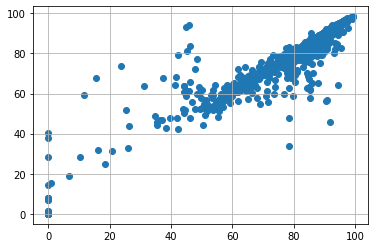

In [1066]:
plt.scatter(y1_test_new,predicted1)
plt.grid(True);

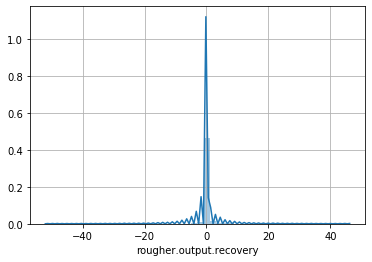

In [1067]:
sns.distplot((y1_test_new,predicted1));
plt.grid(True);

<span style="color:Green">

**2019-12-29 DD**

Ага, простая, но эффективная визуализация ошибки.

</span>

In [1068]:
model_final = RandomForestRegressor(random_state=12345)
model_final.fit(X2_train, y2_train)
predicted2 = model_final.predict(X2_test_new)

In [1069]:
y2_test_new.mean()

65.60909883855349

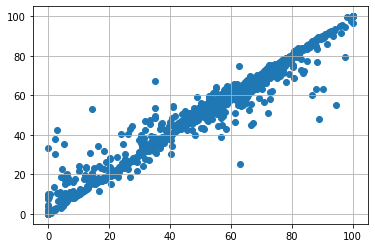

In [1070]:
plt.scatter(y2_test_new,predicted2)
plt.grid(True);

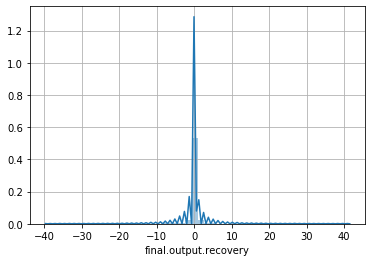

In [1071]:
sns.distplot((y2_test_new-predicted2));
plt.grid(True);

#### <span style="color:light blue"> если даже проверять на тестовой выборке исходного датасета, все равно среднее значение попадает в интервал целевового признака и предсказания </span>

<span style="color:Green">
    
**2019-12-27 DD**

Какой, в итоге, получился общий sMAPE? 1.56 для RF? Высокие значения точности могут говорить о переобученности модели, хотя ты верно разделила датасет на две части. Возможно, действительно модель столь хороша, потому что данные - очень чистые вследствии удаления из них спорных строк. Но такие чистые данные могут уже и не отражать всю реальную картину.

Предлагаю ещё раз пересмотреть, как ты подготавливаешь данные. Обязательно заглянуть в полный датасет, проверять данные на тестовой выборке (из файла gold_recovery_train.csv). Полные данные подскажут, как тестовую выборку превратить в рабочую.

И, да, было бы хорошо "причесать" ноутбук. Сейчас он выглядит, как черновик.

</span>

#### <span style="color:light blue"> P.S. в слаке советовали, просто удалить те признаки, которых нет в тестовой и добавить только целевые, неуверена была снова насколько это правильно, но с другой стороны, т.к. я добавила в новую тестовую выборку признаки, которых не было, при обучении и прасчете метрик получались "отличные" величины, что, как писали ранее, говорит вероятнее всего о переобучении. С Наступающим!)</span>

<span style="color:Green">

**2019-12-29 DD**

Я думаю, что правильнее было бы сделать с минимальным вмешательством в условия задачи, т.е., да, удалить из train те признаки, которых нет в test, и решать исходя из этого, т.к., возможно, в реальной жизни для модели действительно не будут доступны все признаки. Если хочешь, то может попробовать переделать проект для данного подхода, посмотреть на результат.

В целом, у тебя верная логика решения, поэтому проект принимается.

И, да, взаимно! С наступающими праздниками!

</span>